In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit #, Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import math

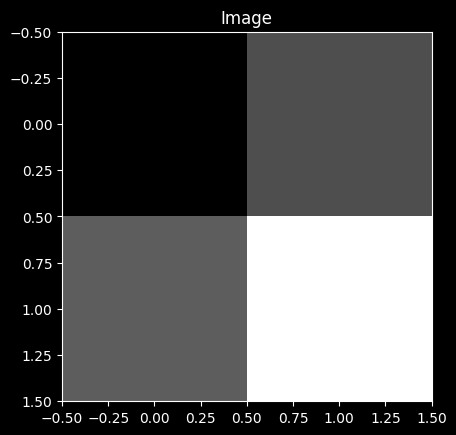

In [2]:
image = np.random.uniform(low=0, high=255, size=(2,2)).astype(int)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.show()

w_bits = int(np.ceil(math.log(image.shape[1],2)))
h_bits = int(np.ceil(math.log(image.shape[0],2)))
if not w_bits: w_bits = 1
if not h_bits: h_bits = 1

In [3]:
im_list = image.flatten()
ind_list = sorted(range(len(im_list)), key=lambda k:im_list[k])
max_index = max(ind_list)
#now in angles: theta = intensity, phi = coordinate
thetas = np.interp(im_list, (0, 256), (0, np.pi/2))
phis = np.interp(range(len(im_list)), (0, len(im_list)), (0, np.pi/2))

In [4]:
num_ind_bits = int(np.ceil(math.log(len(im_list),2)))
if not num_ind_bits:
    num_ind_bits = 1
num_ind_bits

2

In [14]:
thetas

array([0.08590292, 0.41110685, 0.47246608, 1.14128171])

In [15]:
def calculate_alpha(theta, qubit_levels, current_level=1):

    alpha = []
    step_size = 2**(qubit_levels - current_level)  # Number of states per group
    for i in range(0, len(theta), step_size * 2):
        sum_0 = np.sum(theta[i:i+step_size]**2)
        sum_1 = np.sum(theta[i+step_size:i+2*step_size]**2)
        alpha_angle = np.arctan(np.sqrt(sum_1 / sum_0)) if sum_0 != 0 else np.pi/2
        alpha.append(alpha_angle)
    return alpha

alpha_values_2x2 = {}
for qubit in range(1, 3):
    alpha_values_2x2[f'Level {qubit}'] =  calculate_alpha(thetas, 2, qubit)

In [16]:
alpha_values_2x2

{'Level 1': [np.float64(1.2430477364847157)],
 'Level 2': [np.float64(1.364804990119065), np.float64(1.178297904644647)]}

In [28]:
#seg = QuantumRegister(1)
image = QuantumRegister(num_ind_bits)
cr = ClassicalRegister(image.size, "cl_reg")
qc = QuantumCircuit(image, cr)

qc.id(image)
#qc.h(seg)
qc.barrier()
qc.rx(alpha_values_2x2['Level 1'][0], image[0])
qc.barrier()
qc.x(image[0])
qc.crx(alpha_values_2x2['Level 2'][0], image[0], image[1])
qc.x(image[0])
qc.barrier()
qc.crx(alpha_values_2x2['Level 2'][1], image[0], image[1])
qc.barrier()

qc.measure(list(reversed(range(qc.num_qubits))), list(range(cr.size)))

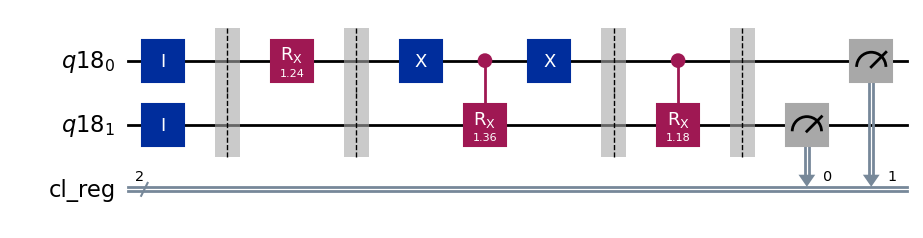

In [29]:
mpl_circuit = qc.draw(output='mpl')

In [32]:
from qiskit import transpile
from qiskit_aer import AerSimulator

# Create the AerSimulator backend
aer_sim = AerSimulator()

# Transpile the quantum circuit for the simulator
t_qc_image = transpile(qc, aer_sim)

# Run the simulation with the specified number of shots
job_oqim = aer_sim.run(t_qc_image, shots=100000)

# Get the result of the simulation
result_oqim = job_oqim.result()

# Retrieve the measurement counts
counts_oqim = result_oqim.get_counts()
counts_oqim

{'01': 26217, '10': 23372, '11': 10521, '00': 39890}

In [ ]:
classical_colors = []
for i in range(0, max_index+1):
    color_list = []
    for item in counts_oqim.items():
        key = item[0]
        print(key)
        bin_coord = key[1:]
        int_coord = int(bin_coord, 2)
        if int_coord == i:
                color_list.append((key[0], key))
    color_amount = 0
    prit
    for color, amount in color_list:
        if not int(color):
            color_amount= color_amount+key
    try:
        color = np.arccos((color_amount/sum(n for _, n in color_list))**(1/2))
        classical_colors.append(color)
    except ZeroDivisionError:
        print("ZeroDivisionError")
        
    coord_amount = 0

01
10
11
00
[('00', '00')]


TypeError: unsupported operand type(s) for +: 'int' and 'str'